In [2]:
print("hello")

hello


In [3]:
import pandas as pd

In [4]:
updatedData = pd.read_csv('India covid 19 datasheet.csv')

In [5]:
updatedData.head()

,DATE,TOTAL CASES,TOTAL DEATHS
0,02-02-20,2,0
1,03-02-20,3,0
2,02-03-20,5,0
3,03-03-20,6,0
4,04-03-20,28,0


In [6]:
data = updatedData.rename(columns={"DATE": "Date", "TOTAL CASES": "Total_cases","TOTAL DEATHS" : "Total_deaths"})
data.head()

,Date,Total_cases,Total_deaths
0,02-02-20,2,0
1,03-02-20,3,0
2,02-03-20,5,0
3,03-03-20,6,0
4,04-03-20,28,0


In [9]:
data.describe()

,Total_cases,Total_deaths
count,122.000000,122.000000
mean,109557.778689,3329.401639
std,147791.225917,4544.131332
min,2.000000,0.000000
25%,1287.500000,32.750000
50%,32698.500000,1041.500000
75%,171772.000000,4904.750000
max,548318.000000,16475.000000


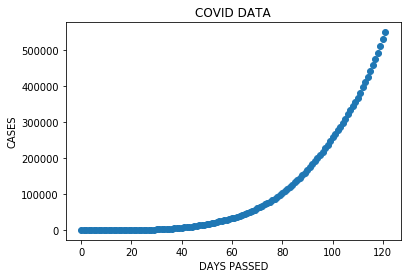

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.scatter(data.Date.index, data.Total_cases)
plt.title('COVID DATA')
plt.xlabel("DAYS PASSED")
plt.ylabel('CASES')
plt.show()

In [12]:
#adding a column to the DataFrame which can be used to predict the total cases after x days 
a = []
for i in range(1,123):
  a.append(i)

data['Days_passed'] = a

In [14]:
data.head()

,Date,Total_cases,Total_deaths,Days_passed
0,02-02-20,2,0,1
1,03-02-20,3,0,2
2,02-03-20,5,0,3
3,03-03-20,6,0,4
4,04-03-20,28,0,5


In [27]:
#splitting the data into train and test.

X = np.array(data.Days_passed).reshape(-1, 1) 
y = np.array(data.Total_cases).reshape(-1, 1) 
 
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
  
#Applying Regression model
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.8214788811820829


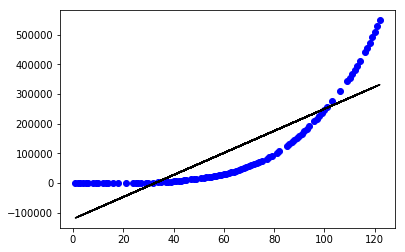

In [28]:
y_pred = regr.predict(X_train) 
plt.scatter(X_train, y_train, color ='b') 
plt.plot(X_train, y_pred, color ='k') 
  
plt.show() 

#We can see from the graph that our model is unerfitting and thus we have to make our model more complex

In [29]:
#According to Regression Model

#prdicting what would be total numbr of cases tommorrow
print(regr.predict([[146]]))

#Increase in Total no. of cases would be 
print(regr.predict([[146]]) - regr.predict([[145]]))

[[420255.67924094]]
[[3710.45714294]]


In [30]:
#Applying Polynomial regression to our data set to increase the complexity of our model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #degree = 2 implies max pow is 2
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

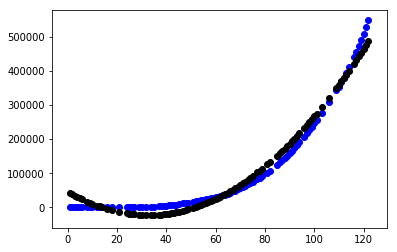

In [31]:
y_pred = lin_reg_2.predict(X_poly)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [32]:
#According to Polynomial Regression Model

#Accuracy 
X_tpoly = poly_reg.fit_transform(X_test)
print(lin_reg_2.score(X_tpoly,y_test))


#prdicting what would be total numbr of cases tommorrow
print(lin_reg_2.predict(poly_reg.fit_transform([[146]])))

#Increase in Total no. of cases would be 
print(lin_reg_2.predict(poly_reg.fit_transform([[146]]))-lin_reg_2.predict(poly_reg.fit_transform([[145]])))

0.9813950444915057
[[798194.67743689]]
[[14447.22414889]]


In [33]:
#SVR

# Changing the data into standard scalar format or bringing the data into a range
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_X = StandardScaler()
sv_x = sc_X.fit_transform(X_train)
sc_Y = StandardScaler()
sv_y = sc_Y.fit_transform(y_train)

/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


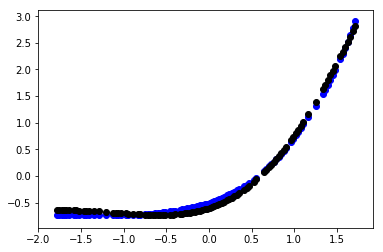

In [79]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C=1e3, gamma=0.1)  #Here we are using kernel as rbf which is good for our dataset
svr.fit(sv_x,sv_y.ravel())


y_pred = svr.predict(sv_x)
plt.scatter(sv_x, sv_y, color ='b')
plt.scatter(sv_x, y_pred,color = 'k') 
  
plt.show() 

In [80]:
sv_tx = sc_X.fit_transform(X_test)
sv_ty = sc_Y.fit_transform(y_test)
print(svr.score(sv_x, sv_y))
print(svr.score(sv_tx,sv_ty))

#printig the model accuracy on training and test data
#We can see that svr is overfitting as it is giving 99% accuracy for training data

0.9952236232741616
0.995367177079789


/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
#predicting the numer of cases tommorow
predict = sc_Y.inverse_transform(svr.predict(sc_X.transform([[146]])))
print(predict)
#New cases
print(sc_Y.inverse_transform(svr.predict(sc_X.transform([[146]])))-sc_Y.inverse_transform(svr.predict(sc_X.transform([[145]]))))

[805919.89962732]
[12606.68957605]


In [82]:
# DTR

#Applying Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

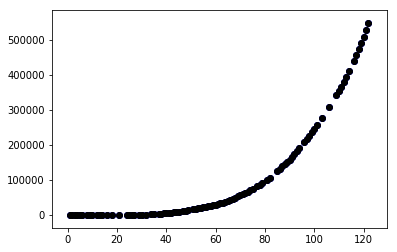

In [83]:
y_pred = dtr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [84]:
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))
dtr.predict([[146]])

#DTr is overfitting as it giving 100% accuracy 

1.0
0.9978119600846936


array([548318.])

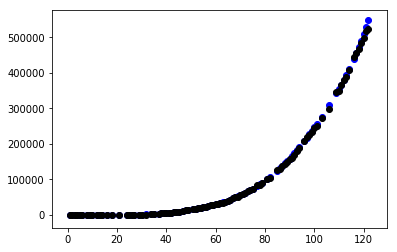

In [85]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10,random_state=0)
rfr.fit(X_train,y_train.ravel())

y_pred = rfr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [86]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.9994830465792933
0.9989874765840431


In [87]:
# No. of total cases 
print("linear Regression -- ",regr.predict([[146]]))
print("polynomial Regression -- ",lin_reg_2.predict(poly_reg.fit_transform([[146]])))
print("SVR -- ", predict)
print("Decision Tree Regression -- ",dtr.predict([[146]]))
print("Random forest regression -- ",rfr.predict([[146]]))

linear Regression --  [[420255.67924094]]
polynomial Regression --  [[798194.67743689]]
SVR --  [805919.89962732]
Decision Tree Regression --  [548318.]
Random forest regression --  [524925.1]


In [98]:
#As Svm was giving max accuracy we used it to predict maximum number of cases
a = []
b = []
x = 0
y = 0
predict = sc_Y.inverse_transform(svr.predict(sc_X.transform([[145]])))
b.append(1)
a.append(predict)
for i in range(1,400):
    predict = sc_Y.inverse_transform(svr.predict(sc_X.transform([[i+145]])))
    b.append(i+1)
    a.append(predict)
    if(x < predict):
        x = predict
        y = i

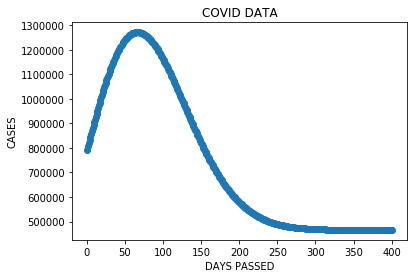

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.scatter(b, a)
plt.title('COVID DATA')
plt.xlabel("DAYS PASSED")
plt.ylabel('CASES')
plt.show()

In [100]:
print("Maximum cases",x,"on day",y)

Maximum cases [1271614.11090506] on day 66
